##KREIRANJE GRAF

In [ ]:
!pip install ogb
import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=2b89c2ee57d9df76b9c83facc2c08b34b4b135b227ee0da4ed090c8ed31eb4b0
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 23.4 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 45.7 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-gzgdkgu1
  Running command git clone --filter=blob:none --quiet

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
links = pd.read_csv("/content/drive/MyDrive/Proekt/test_sample.csv")
desc = pd.read_csv("/content/drive/MyDrive/Proekt/test_sample_desc.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Label encode the "industry" column in the DataFrame
desc['industry'] = label_encoder.fit_transform(desc['industry'])


In [ ]:
dic = {}
for row in links.values:
    home_name = row[0]
    link_name = row[1]

    if home_name not in dic:
        dic[home_name] = []
    dic[home_name].append(link_name)

In [ ]:
dic

{'Accenture': ['Tribune', 'Intertek'],
 'TQS': ['Canadian Broadcasting'],
 'Standard Chartered': ['IBM'],
 'Splunk': ['Ensighten', 'KKR', 'Risk Focus', 'Flexion-IS'],
 'SAS': ['SOPRA GROUP DIRECTION GENERALE',
  'Tabulaex Srl',
  'Kappa Egitim Danismanlik Ve Arastirma Ltd STI',
  'China Consultants of Advisory & Financial Management Co Ltd',
  'iDimension MSC Sdn Bhd',
  'Almaviva SpA',
  'Instituto de Fomento Sanitario',
  'Fors Energy LLC'],
 'Connotate': ['SJV'],
 'Palo Alto Networks': ['Landkreis Grafschaft Bentheim'],
 'CIBC': ['Sonic Wall'],
 'Crane &': ['DHL'],
 'The Blackstone Group LP': ['Crocs'],
 'F5 Networks': ['Chrysler'],
 'Honda': ['Suzuki'],
 'Northern Trust': ['Solstice'],
 'Ixia': ['AMD', 'AMD', 'Extreme Networks'],
 'Microsoft': ['Sophos',
  'OmniVue',
  'Yoplait',
  'Universal Studios',
  'Jeep',
  'NCR',
  'Lexmark',
  'trueITpros, LLC',
  'Ascentis',
  'Blue Stone Backup',
  'Tyler Technologies',
  'Abshier Enterprises, Inc.',
  'Telog Instruments',
  'EDF',
  'Da

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for home_name in dic.keys():
    G.add_node(home_name, name = home_name)
    for link_name in dic[home_name]:
        edge_label = 'nan'
        G.add_node(link_name, name = link_name )
        filtered_links = links[(links['home_name'] == home_name) & (links['link_name'] == link_name)]
        if not filtered_links.empty:
          edge_label = filtered_links['type'].values[0]
        G.add_edge(home_name, link_name, label=edge_label)


In [ ]:
print("Number of nodes", G.number_of_nodes())
print("Number of edges", G.number_of_edges())

Number of nodes 2395
Number of edges 1992


In [ ]:
G.nodes

NodeView(('Accenture', 'Tribune', 'Intertek', 'TQS', 'Canadian Broadcasting', 'Standard Chartered', 'IBM', 'Splunk', 'Ensighten', 'KKR', 'Risk Focus', 'Flexion-IS', 'SAS', 'SOPRA GROUP DIRECTION GENERALE', 'Tabulaex Srl', 'Kappa Egitim Danismanlik Ve Arastirma Ltd STI', 'China Consultants of Advisory & Financial Management Co Ltd', 'iDimension MSC Sdn Bhd', 'Almaviva SpA', 'Instituto de Fomento Sanitario', 'Fors Energy LLC', 'Connotate', 'SJV', 'Palo Alto Networks', 'Landkreis Grafschaft Bentheim', 'CIBC', 'Sonic Wall', 'Crane &', 'DHL', 'The Blackstone Group LP', 'Crocs', 'F5 Networks', 'Chrysler', 'Honda', 'Suzuki', 'Northern Trust', 'Solstice', 'Ixia', 'AMD', 'Extreme Networks', 'Microsoft', 'Sophos', 'OmniVue', 'Yoplait', 'Universal Studios', 'Jeep', 'NCR', 'Lexmark', 'trueITpros, LLC', 'Ascentis', 'Blue Stone Backup', 'Tyler Technologies', 'Abshier Enterprises, Inc.', 'Telog Instruments', 'EDF', 'Data2save', 'Forum Info-Tech, Inc.', 'R2AD', 'ADP', 'PKF', 'Tribridge', 'Hewlett-Pack

In [ ]:
node_dict = {}
next_index = 0

for node in G.nodes:
    if node not in node_dict:
        node_dict[node] = next_index
        next_index += 1

In [ ]:
print(node_dict)

{'Accenture': 0, 'Tribune': 1, 'Intertek': 2, 'TQS': 3, 'Canadian Broadcasting': 4, 'Standard Chartered': 5, 'IBM': 6, 'Splunk': 7, 'Ensighten': 8, 'KKR': 9, 'Risk Focus': 10, 'Flexion-IS': 11, 'SAS': 12, 'SOPRA GROUP DIRECTION GENERALE': 13, 'Tabulaex Srl': 14, 'Kappa Egitim Danismanlik Ve Arastirma Ltd STI': 15, 'China Consultants of Advisory & Financial Management Co Ltd': 16, 'iDimension MSC Sdn Bhd': 17, 'Almaviva SpA': 18, 'Instituto de Fomento Sanitario': 19, 'Fors Energy LLC': 20, 'Connotate': 21, 'SJV': 22, 'Palo Alto Networks': 23, 'Landkreis Grafschaft Bentheim': 24, 'CIBC': 25, 'Sonic Wall': 26, 'Crane &': 27, 'DHL': 28, 'The Blackstone Group LP': 29, 'Crocs': 30, 'F5 Networks': 31, 'Chrysler': 32, 'Honda': 33, 'Suzuki': 34, 'Northern Trust': 35, 'Solstice': 36, 'Ixia': 37, 'AMD': 38, 'Extreme Networks': 39, 'Microsoft': 40, 'Sophos': 41, 'OmniVue': 42, 'Yoplait': 43, 'Universal Studios': 44, 'Jeep': 45, 'NCR': 46, 'Lexmark': 47, 'trueITpros, LLC': 48, 'Ascentis': 49, 'Blue

In [ ]:
for node, index in node_dict.items():
    G = nx.relabel_nodes(G, {node: index})

In [ ]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [ ]:
import networkx as nx

for u, v in G.edges():
    edge_data = G.get_edge_data(u, v)
    if edge_data is not None and 'label' in edge_data:
        edge_label = edge_data['label']
        print(f"Edge ({u}, {v}) has label: {edge_label}")
    else:
        print(f"Edge ({u}, {v}) has no label")


Edge (0, 1) has label: investment
Edge (0, 2) has label: customer
Edge (0, 367) has label: customer
Edge (0, 547) has label: partnership
Edge (0, 824) has label: partnership
Edge (3, 4) has label: investment
Edge (5, 6) has label: supplier
Edge (5, 416) has label: investment
Edge (6, 380) has label: customer
Edge (6, 381) has label: supplier
Edge (6, 382) has label: investment
Edge (6, 383) has label: investment
Edge (6, 384) has label: customer
Edge (6, 385) has label: customer
Edge (6, 386) has label: supplier
Edge (6, 387) has label: customer
Edge (6, 388) has label: investment
Edge (6, 389) has label: partnership
Edge (6, 390) has label: customer
Edge (6, 391) has label: investment
Edge (6, 392) has label: partnership
Edge (6, 393) has label: partnership
Edge (6, 394) has label: customer
Edge (6, 395) has label: competitor
Edge (6, 396) has label: investment
Edge (6, 397) has label: partnership
Edge (6, 398) has label: customer
Edge (6, 532) has label: supplier
Edge (6, 844) has la

##DODAVANJE FEATURES I LABELS

In [ ]:
import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Found existing installation: torch-scatter 2.1.1+pt20cu118
Uninstalling torch-scatter-2.1.1+pt20cu118:
  Successfully uninstalled torch-scatter-2.1.1+pt20cu118
Found existing installation: torch-sparse 0.6.17+pt20cu118
Uninstalling torch-sparse-0.6.17+pt20cu118:
  Successfully uninstalled torch-sparse-0.6.17+pt20cu118
Found existing installation: torch_geometric 2.4.0
Uninstalling torch_geometric-2.4.0:
  Successfully uninstalled torch_geometric-2.4.0
Found existing installation: torch-cluster 1.6.1+pt20cu118
Uninstalling torch-cluster-1.6.1+pt20cu118:
  Successfully uninstalled torch-cluster-1.6.1+pt20cu118
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
  Using cached https://data.pyg.org/whl/torch-2.0.0%2Bcu118/torch_scatter-2.1.1%2Bpt20cu118-cp310-cp310-linux_x86_64.whl (10.2 MB)
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
  Using cached https://data.pyg.org/whl/torch-2.0.0%2Bcu118/torch_sparse-0.6.17%2Bpt20cu118-cp310-cp310-linux_x86_64.whl 

In [ ]:
for index, row in desc.iterrows():
    name = row['name']
    industry = row['industry']

    if name in node_dict:
        node_id = node_dict[name]
        G.nodes[node_id]['feature'] =  int(industry)

In [ ]:
from torch_geometric.utils.convert import to_networkx, from_networkx
pyg_graph = from_networkx(G)

In [ ]:
feature_values = [G.nodes[node_id]["feature"] for node_id in G.nodes()]
features = torch.tensor(feature_values, dtype=torch.long)

In [ ]:
pyg_graph.x = features.reshape(-1, 1)

In [ ]:
print("Edge index:", pyg_graph.edge_index)
print("Adjacency matrix:\n", nx.adjacency_matrix(G).todense())

Edge index: tensor([[   0,    0,    0,  ..., 2392, 2393, 2394],
        [   1,    2,  367,  ..., 1999,  112, 2349]])
Adjacency matrix:
 [[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
pyg_graph.num_nodes

2395

In [ ]:
import torch
import networkx as nx

edge_labels = []
for i in range(pyg_graph.num_nodes):
    for j in range(pyg_graph.num_nodes):
        if G.has_edge(i, j):
            edge_label = G.edges[i, j]['label']
            if edge_label == 'partnership':
              edge_labels.append(1)
            elif edge_label == 'customer':
              edge_labels.append(2)
            elif edge_label == 'investment':
              edge_labels.append(3)
            elif edge_label == 'supplier':
              edge_labels.append(4)
            elif edge_label == 'competitor':
              edge_labels.append(5)
            elif edge_label == 'nan':
              edge_labels.append(6)
            else:
              edge_labels.append(0)

# Convert edge labels list to PyTorch tensor
y = torch.tensor(edge_labels, dtype=torch.long).reshape(-1, 1)
pyg_graph.y = y


In [ ]:
unique_values = torch.unique(pyg_graph.y)
print(unique_values)

tensor([1, 2, 3, 4, 5, 6])


In [ ]:
unique_values = torch.unique(pyg_graph.x)
print(unique_values)

tensor([   0,    1,    2,  ..., 1567, 1568, 1569])


In [ ]:
print(pyg_graph)
print(pyg_graph.x)
print(pyg_graph.y)
print(pyg_graph.edge_index)

Data(edge_index=[2, 3983], name=[2395], feature=[2395], label=[3983], num_nodes=2395, x=[2395, 1], y=[3983, 1])
tensor([[ 271],
        [ 985],
        [1224],
        ...,
        [ 143],
        [ 117],
        [ 247]])
tensor([[3],
        [2],
        [2],
        ...,
        [4],
        [1],
        [4]])
tensor([[   0,    0,    0,  ..., 2392, 2393, 2394],
        [   1,    2,  367,  ..., 1999,  112, 2349]])


## TRAIN TEST VALIDATION

In [ ]:
train_edges = torch.load('/content/drive/MyDrive/Proekt/train_edges.pth')
test_edges = torch.load('/content/drive/MyDrive/Proekt/test_edges.pth')
valid_edges = torch.load('/content/drive/MyDrive/Proekt/valid_edges.pth')

##MODEL

In [ ]:
import torch
import torch_geometric
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import SGConv
from torch_geometric.utils import negative_sampling
from tqdm import trange

class SGC(torch.nn.Module):

    def __init__(self, conv, in_channels, hidden_channels, out_channels, num_layers, dropout):
        super(SGC, self).__init__()

        self.convs = torch.nn.ModuleList()
        assert (num_layers >= 2), 'Have at least 2 layers'
        self.convs.append(conv(in_channels, hidden_channels, normalize=True))
        for l in range(num_layers - 2):
            self.convs.append(conv(hidden_channels, hidden_channels, normalize=True))
        self.convs.append(conv(hidden_channels, out_channels, normalize=True))

        self.num_layers = num_layers
        self.dropout = dropout

    def forward(self, x, edge_index, edge_attr):
        if edge_attr is not None:
            return self.forward_with_edge_attr(x, edge_index, edge_attr)

        for i in range(self.num_layers - 1):
            x = self.convs[i](x, edge_index)
            x = F.relu(x)

            x = F.dropout(x, p=self.dropout, training=self.training)


        x = self.convs[self.num_layers - 1](x, edge_index)
        return x

    def forward_with_edge_attr(self, x, edge_index, edge_attr):
        for i in range(self.num_layers - 1):
            x = self.convs[i](x, edge_index, edge_attr)
            x = F.relu(x)

            x = F.dropout(x, p=self.dropout,training=self.training)

        x = self.convs[self.num_layers - 1](x, edge_index, edge_attr)
        return x

In [ ]:
graphsage_in_channels = 2
graphsage_hidden_channels = 32 # eden jazol so kolku brojki kje se opise, kolkava da bide niazta(vektor)
graphsage_out_channels = 16
graphsage_num_layers = 2
dropout = 0.5

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
initial_node_embeddings = torch.nn.Embedding(pyg_graph.num_nodes, graphsage_in_channels).to(device) # Za site jazli pravi pocetna informacija

In [ ]:
graphsage_model = SGC(SGConv, graphsage_in_channels,
                                 graphsage_hidden_channels,
                                 graphsage_out_channels,
                                 graphsage_num_layers,
                                 dropout).to(device)

In [ ]:
link_predictor_in_channels = graphsage_out_channels
link_predictor_hidden_channels = link_predictor_in_channels

In [ ]:
class LinkPredictor(torch.nn.Module):

    def __init__(self, in_channels, hidden_channels, dropout, out_channels=1,
                concat=lambda x, y: x * y):
        super(LinkPredictor, self).__init__()

        self.model = nn.Sequential(nn.Linear(in_channels, hidden_channels), nn.ReLU(),
                                  nn.Dropout(p=dropout), nn.Linear(hidden_channels, out_channels), nn.Sigmoid())

        self.concat = concat

    def forward(self, u, v):
        x = self.concat(u, v)
        return self.model(x)

In [ ]:
link_predictor = LinkPredictor(in_channels=link_predictor_in_channels,
                               hidden_channels=link_predictor_hidden_channels,
                               dropout=dropout).to(device)

In [ ]:
def train(graphsage_model, link_predictor, initial_node_embeddings, edge_index,
          pos_train_edges, optimizer, batch_size, edge_attr=None):

    total_loss, total_examples = 0, 0

    graphsage_model.train()
    link_predictor.train()

    for pos_samples in DataLoader(pos_train_edges, batch_size, shuffle=True):
        optimizer.zero_grad()

        node_embeddings = graphsage_model(initial_node_embeddings, edge_index, edge_attr) # prv vlezen parametar go dava pocetion opsin(vektor) na jazolot, vtoriot paramtar e koj jazol so koj e povrzan
        # node embedding e krajniot vektor na jazolot


        neg_samples = negative_sampling(edge_index,
                                        num_nodes=initial_node_embeddings.size(0),
                                        num_neg_samples=len(pos_samples),
                                        method='dense')

        pos_preds = link_predictor(node_embeddings[pos_samples[:, 0]],
                                    node_embeddings[pos_samples[:, 1]]) # linkovite so gi poguduvam i treba da postoat

        neg_preds = link_predictor(node_embeddings[neg_samples[0]],
                                    node_embeddings[neg_samples[1]]) # linkvoite so vikam deka gi ima a ne treba da ima

        preds = torch.concat((pos_preds, neg_preds)) # se maksizimiziraat vistinsko pogodenite a minimiziraat nepostoecko kazanite deka kje postoat
        labels = torch.concat((torch.ones_like(pos_preds),
                                torch.zeros_like(neg_preds))) # koi svarno postoat, koi ne postoat

        loss = F.binary_cross_entropy(preds, labels)

        loss.backward()
        optimizer.step()

        num_examples = len(pos_preds)
        total_loss += loss.item() * num_examples
        total_examples += num_examples

    return total_loss / total_examples

In [ ]:
lr = 0.005
batch_size = 32
epochs = 100
eval_steps = 10

In [ ]:
optimizer = torch.optim.Adam(list(graphsage_model.parameters()) + list(initial_node_embeddings.parameters()) + list(link_predictor.parameters()), lr=lr)

In [ ]:
pos_valid_edges = valid_edges['edge'].to(device)
neg_valid_edges = valid_edges['edge_neg'].to(device)
pos_test_edges = test_edges['edge'].to(device)
neg_test_edges = test_edges['edge_neg'].to(device)

In [ ]:
@torch.no_grad()
def test(graphsage_model, link_predictor, initial_node_embeddings, edge_index, pos_valid_edges, neg_valid_edges, pos_test_edges, neg_test_edges, batch_size, evaluator, edge_attr=None):
    graphsage_model.eval()
    link_predictor.eval()

    final_node_embeddings = graphsage_model(initial_node_embeddings, edge_index, edge_attr)

    pos_valid_preds = []
    for pos_samples in DataLoader(pos_valid_edges, batch_size):
        pos_preds = link_predictor(final_node_embeddings[pos_samples[:, 0]],
                                    final_node_embeddings[pos_samples[:, 1]])
        pos_valid_preds.append(pos_preds.squeeze())
    pos_valid_pred = torch.cat(pos_valid_preds, dim=0)

    neg_valid_preds = []
    for neg_samples in DataLoader(neg_valid_edges, batch_size):
        neg_preds = link_predictor(final_node_embeddings[neg_samples[:, 0]],
                                    final_node_embeddings[neg_samples[:, 1]])
        neg_valid_preds.append(neg_preds.squeeze())
    neg_valid_pred = torch.cat(neg_valid_preds, dim=0)

    pos_test_preds = []
    for pos_samples in DataLoader(pos_test_edges, batch_size):
        pos_preds = link_predictor(final_node_embeddings[pos_samples[:, 0]],
                                    final_node_embeddings[pos_samples[:, 1]])
        pos_test_preds.append(pos_preds.squeeze())
    pos_test_pred = torch.cat(pos_test_preds, dim=0)

    neg_test_preds = []
    for neg_samples in DataLoader(neg_test_edges, batch_size):
        neg_preds = link_predictor(final_node_embeddings[neg_samples[:, 0]],
                                    final_node_embeddings[neg_samples[:, 1]])
        neg_test_preds.append(neg_preds.squeeze())
    neg_test_pred = torch.cat(neg_test_preds, dim=0)

    evaluator.K = 20
    valid_hits = evaluator.eval({'y_pred_pos': pos_valid_pred, 'y_pred_neg': neg_valid_pred})
    test_hits = evaluator.eval({'y_pred_pos': pos_test_pred, 'y_pred_neg': neg_test_pred})

    return valid_hits, test_hits

In [ ]:
from ogb.linkproppred import Evaluator

evaluator = Evaluator(name = 'ogbl-ddi')
evaluator.K = 3
evaluator.eval({'y_pred_pos': torch.tensor([0.95, 0.7, 0.6, 0.4]), 'y_pred_neg': torch.tensor([0.6, 0.5, 0.45, 0.2, 0.1])})

{'hits@3': 0.75}

Loss 0.3051:  10%|█         | 10/100 [00:12<01:51,  1.24s/it]


Epoch: 10, Validation Hits@20: 0.7022, Test Hits@20: 0.3814


Loss 0.2384:  20%|██        | 20/100 [00:24<01:32,  1.16s/it]


Epoch: 20, Validation Hits@20: 0.7398, Test Hits@20: 0.3927


Loss 0.2305:  30%|███       | 30/100 [00:37<01:20,  1.15s/it]


Epoch: 30, Validation Hits@20: 0.6897, Test Hits@20: 0.4755


Loss 0.2140:  40%|████      | 40/100 [00:50<01:13,  1.23s/it]


Epoch: 40, Validation Hits@20: 0.7304, Test Hits@20: 0.4241


Loss 0.1834:  50%|█████     | 50/100 [01:02<00:59,  1.19s/it]


Epoch: 50, Validation Hits@20: 0.6959, Test Hits@20: 0.4216


Loss 0.1829:  60%|██████    | 60/100 [01:15<00:56,  1.42s/it]


Epoch: 60, Validation Hits@20: 0.7304, Test Hits@20: 0.4718


Loss 0.1915:  70%|███████   | 70/100 [01:26<00:37,  1.24s/it]


Epoch: 70, Validation Hits@20: 0.7241, Test Hits@20: 0.5069


Loss 0.1767:  80%|████████  | 80/100 [01:39<00:23,  1.19s/it]


Epoch: 80, Validation Hits@20: 0.7273, Test Hits@20: 0.5282


Loss 0.1591:  90%|█████████ | 90/100 [01:50<00:10,  1.05s/it]


Epoch: 90, Validation Hits@20: 0.7586, Test Hits@20: 0.5471


Loss 0.1480: 100%|██████████| 100/100 [02:02<00:00,  1.23s/it]



Epoch: 100, Validation Hits@20: 0.7524, Test Hits@20: 0.5232


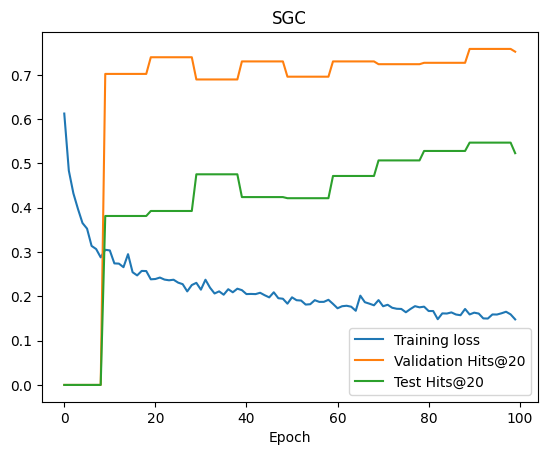

In [ ]:
import matplotlib.pyplot as plt

epochs_bar = trange(1, epochs + 1, desc='Loss n/a')

edge_index = pyg_graph.edge_index.to(device)
pos_train_edges = train_edges['edge'].to(device)

losses = []
valid_hits_list = []
test_hits_list = []
for epoch in epochs_bar:
    loss = train(graphsage_model, link_predictor, initial_node_embeddings.weight, edge_index, pos_train_edges, optimizer, batch_size)
    losses.append(loss)

    epochs_bar.set_description(f'Loss {loss:0.4f}')

    if epoch % eval_steps == 0:
        valid_hits, test_hits = test(graphsage_model, link_predictor, initial_node_embeddings.weight, edge_index, pos_valid_edges, neg_valid_edges, pos_test_edges, neg_test_edges, batch_size, evaluator)
        print()
        print(f'Epoch: {epoch}, Validation Hits@20: {valid_hits["hits@20"]:0.4f}, Test Hits@20: {test_hits["hits@20"]:0.4f}')
        valid_hits_list.append(valid_hits['hits@20'])
        test_hits_list.append(test_hits['hits@20'])
    else:
        valid_hits_list.append(valid_hits_list[-1] if valid_hits_list else 0)
        test_hits_list.append(test_hits_list[-1] if test_hits_list else 0)

plt.title("SGC")
plt.xlabel("Epoch")
plt.plot(losses, label="Training loss")
plt.plot(valid_hits_list, label="Validation Hits@20")
plt.plot(test_hits_list, label="Test Hits@20")
plt.legend()
plt.show()

##TRAIN-TEST, DODAVANJE POSITIVE I NEGATIVE EDGES

In [ ]:
from sklearn.model_selection import train_test_split

train_edges, test_edges = train_test_split(pyg_graph.edge_index.t().tolist(), test_size=0.2)
train_edges, valid_edges = train_test_split(train_edges, test_size = 0.1)

train_edges = torch.tensor(train_edges, dtype=torch.long)
test_edges = torch.tensor(test_edges, dtype=torch.long)
valid_edges = torch.tensor(valid_edges, dtype=torch.long)

In [ ]:
train_edges

tensor([[2106, 2107],
        [1007,  505],
        [2342, 2341],
        ...,
        [ 629,  628],
        [ 410,  409],
        [2321, 2322]])

In [ ]:
pos_test_edges = test_edges
pos_valid_edges = valid_edges

In [ ]:
def generate_random_edge(num_nodes, train, test, valid):
    u = random.randint(0, num_nodes - 1)
    v = random.randint(0, num_nodes - 1)
    while u == v and (u, v) in train and (v, u) in train and (u, v) in test and (v, u) in test and (u, v) in valid and (v, u) in valid:  # Ensure u and v are distinct nodes
        v = random.randint(0, num_nodes - 1)
    return u, v

In [ ]:
import random
def generate_negative_edges(num_edges, num_nodes, train, test, valid):
    negative_edges = []
    while len(negative_edges) < num_edges:
        u = random.randint(0, num_nodes - 1)
        v = random.randint(0, num_nodes - 1)
        ran1, ran2 = generate_random_edge(num_nodes, train, test, valid)
        negative_edges.append([ran1, ran2])
    return negative_edges

In [ ]:
num_test_positive_edges = len(test_edges)
neg_test_edges = generate_negative_edges(num_test_positive_edges, pyg_graph.num_nodes, train_edges, pos_test_edges, pos_valid_edges)
neg_test_edges = torch.tensor(neg_test_edges, dtype=torch.long)

In [ ]:
pos_test_edges

tensor([[ 337,  335],
        [1083, 2168],
        [ 374,  379],
        ...,
        [  40, 1104],
        [2068, 2069],
        [1683,  336]])

In [ ]:
neg_test_edges

tensor([[1581, 2024],
        [ 506,  497],
        [ 334, 1975],
        ...,
        [1109, 1255],
        [  50, 1062],
        [1484, 1992]])

In [ ]:
train_edges = {"edge":train_edges}

In [ ]:
test_edges = {"edge":pos_test_edges, "edge_neg":neg_test_edges}

In [ ]:
num_valid_positive_edges = len(pos_valid_edges)
neg_valid_edges = generate_negative_edges(num_valid_positive_edges, pyg_graph.num_nodes, train_edges, pos_test_edges, pos_valid_edges)
neg_valid_edges = torch.tensor(neg_valid_edges, dtype=torch.long)


In [ ]:
valid_edges = {"edge":pos_valid_edges, "edge_neg": neg_valid_edges}

In [ ]:
print(f'Number of training positive edges: {train_edges["edge"].shape[0]}')
print(f'Number of test positive edges: {test_edges["edge"].shape[0]}')
print(f'Number of test negative edges: {test_edges["edge_neg"].shape[0]}')
print(f'Number of valid positive edges: {valid_edges["edge"].shape[0]}')
print(f'Number of valid negative edges: {valid_edges["edge_neg"].shape[0]}')


Number of training positive edges: 2867
Number of test positive edges: 797
Number of test negative edges: 797
Number of valid positive edges: 319
Number of valid negative edges: 319
